# <center>Laboratorium 4<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

<a id='zad1'></a>
***Zadanie 1.***   

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor węzłów Czebyszewa (funkcja *chebyshev_nodes*) dany wzorem
  
  $$
  \begin{aligned}
  x(k) = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
  \end{aligned}
  $$

Oraz wagi barycentryczne dla tego typu wezłów (funkcja def *bar\_czeb\_weights*): 
$$
\begin{aligned}
w_j={}&(-1)^j\delta_j\\
\delta_j={}&
\begin{cases}
\frac{1}{2},\quad j=0\ \mathrm{lub}\ j=n\\
1,\quad j\in(0,n)
\end{cases}
\end{aligned}
$$

<a id='zad2'></a>
***Zadanie 2.***  
Do przeprowadzenia ćwiczenia należy zdefiniować następujące funkcje:  
1. Funkcję ciągłą nieróżniczkowalną: $f(x) = \mathrm{sgn}(x)x+x^2$  
2. Funkcję różniczkowalną jednokrotnie: $f(x) = \mathrm{sgn}(x)x^{2}$  
3. Funkcję różniczkowalną trzykrotnie: $f(x)=|\sin(5 x)|^3$  
4. Trzy funkcje analityczne: $f(x) = \cfrac{1}{1+ax^2}$ dla $a \in \{1,25,100\} $    
5. Funkcję nieciągłą: $f(x) = \mathrm{sgn}(x)$

Funkcje można zaimplementować w notaniku lub w pliku main. Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).

In [2]:
f1 = lambda x: np.sign(x)*x +x**2
f2 = lambda x: np.sign(x)*(x**2)
f3 = lambda x: abs(np.sin(5*x))**3
f4_base = lambda x,a: 1/(1+a*(x**2))
f4_1 = lambda x: f4_base(x,1)
f4_2 = lambda x: f4_base(x,25)
f4_3 = lambda x: f4_base(x,100)
f5 = lambda x: np.sign(x)

***Zadanie 3.***  
Dla funkcji ciągłej nieróżniczkowalnej z [Zadania 2](#zad2) przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* oraz przy użyciu wzoru barycentrycznego podanego na wykładzie (funkcja barycentric_inte w main.py).  

Wykonać w węzłach Czebyszewa interpolację rzędu 10, 100, 1000, 10000, 100000. Wyliczyć wartości wielomianu interpolacyjnego w równoodległych punktach w ilości 1000.  

Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  

Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  

Przykład użycia funkcji barycentric_interpolate:

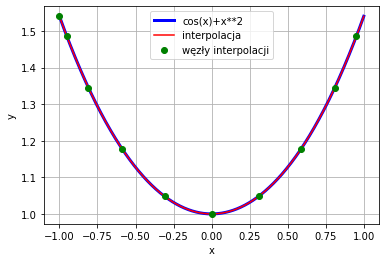

In [3]:
from scipy.interpolate import barycentric_interpolate
%timeit
# funkcja do interpolacji
f = lambda x: np.cos(x)+x**2

# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
interpolation_nodes_number = 10
xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)

# interpoalcja metodą barycentryczną
yimp = barycentric_interpolate(xch,f(xch),x)

plt.plot(x,f(x),'b',  linewidth=3 ,label = 'cos(x)+x**2')
plt.plot(x,yimp,'r',label = 'interpolacja')
plt.plot(xch,f(xch),'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

In [4]:
n = [10, 100, 1000, 10000,100000]

x = np.linspace(-1,1,1000)
"""
for i in range(len(n)):
    interpolation_nodes_number = n[i]
    xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)
    saved_timing = %timeit -r 5 -n 10 -o barycentric_interpolate(xch,f(xch),x)
    time_avg[i] = saved_timing.average
    time_std[i] = saved_timing.stdev
"""

'\nfor i in range(len(n)):\n    interpolation_nodes_number = n[i]\n    xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)\n    saved_timing = %timeit -r 5 -n 10 -o barycentric_interpolate(xch,f(xch),x)\n    time_avg[i] = saved_timing.average\n    time_std[i] = saved_timing.stdev\n'

C:\Users\nikos\anaconda3\lib\site-packages\scipy\interpolate\polyint.py:546: RuntimeWarning: divide by zero encountered in reciprocal
  self.wi **= -1
C:\Users\nikos\anaconda3\lib\site-packages\scipy\interpolate\polyint.py:546: RuntimeWarning: overflow encountered in reciprocal
  self.wi **= -1
C:\Users\nikos\anaconda3\lib\site-packages\scipy\interpolate\polyint.py:641: RuntimeWarning: overflow encountered in true_divide
  c = self.wi/c
C:\Users\nikos\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\nikos\anaconda3\lib\site-packages\scipy\interpolate\polyint.py:545: RuntimeWarning: overflow encountered in reduce
  self.wi[j] = np.multiply.reduce(self.xi[:j]-self.xi[j])
C:\Users\nikos\anaconda3\lib\site-packages\scipy\interpolate\polyint.py:546: RuntimeWarning: divide by zero encountered in reciprocal
  self.wi **= -1
C:\Users\nikos\anaconda3\lib\site-packages

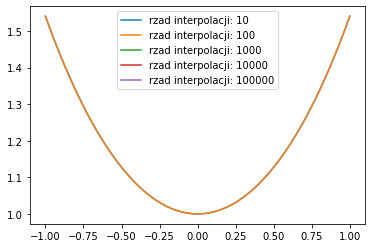

In [5]:
plt.figure()
for i in range(len(n)):
    interpolation_nodes_number = n[i]
    xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)
    y = barycentric_interpolate(xch,f(xch),x)
    plt.plot(x,y, label = "rzad interpolacji: "+str(n[i]))
plt.legend()
plt.show()

In [6]:
#dla 100000 siedzę już 15 min i nic
n = [10, 100, 1000, 10000]
time_avg = np.zeros([len(n)])
time_std = np.zeros([len(n)])

for i in range(len(n)):
    interpolation_nodes_number = n[i]
    xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)
    saved_timing = %timeit -r 5 -n 10 -o barycentric_interpolate(xch,f(xch),x)
    time_avg[i] = saved_timing.average
    time_std[i] = saved_timing.stdev


309 µs ± 85.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.91 ms ± 196 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


C:\Users\nikos\anaconda3\lib\site-packages\scipy\interpolate\polyint.py:546: RuntimeWarning: divide by zero encountered in reciprocal
  self.wi **= -1
C:\Users\nikos\anaconda3\lib\site-packages\scipy\interpolate\polyint.py:546: RuntimeWarning: overflow encountered in reciprocal
  self.wi **= -1
C:\Users\nikos\anaconda3\lib\site-packages\scipy\interpolate\polyint.py:641: RuntimeWarning: overflow encountered in true_divide
  c = self.wi/c
C:\Users\nikos\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


26 ms ± 1.7 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


C:\Users\nikos\anaconda3\lib\site-packages\scipy\interpolate\polyint.py:545: RuntimeWarning: overflow encountered in reduce
  self.wi[j] = np.multiply.reduce(self.xi[:j]-self.xi[j])


390 ms ± 14.8 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [7]:
n = [10, 100, 1000, 10000, 100000]
time_avg2 = np.zeros([len(n)])
time_std2 = np.zeros([len(n)])
for i in range(len(n)):
    interpolation_nodes_number = n[i]
    xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)
    saved_timing = %timeit -r 5 -n 10 -o main.barycentric_inte(xch,f(xch),main.bar_czeb_weights(interpolation_nodes_number),x)
    time_avg2[i] = saved_timing.average
    time_std2[i] = saved_timing.stdev

19.7 µs ± 2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
91.5 µs ± 8.91 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
930 µs ± 81.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
6.02 ms ± 627 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
46.6 ms ± 1.04 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


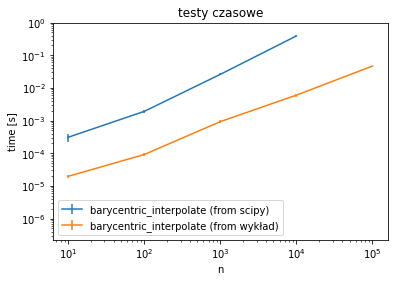

In [8]:
plt.title("testy czasowe")    

plt.yscale("log")
plt.xscale("log")
plt.ylabel("czas [s]")
plt.xlabel("n")
plt.ylabel("time [s]")
plt.ylim([2.22e-7,1])
plt.errorbar(n[0:-1] , time_avg ,yerr= time_std, label = "barycentric_interpolate (from scipy)")
plt.errorbar(n , time_avg2 ,yerr= time_std2, label = "barycentric_interpolate (from wykład)")
plt.legend()



***Zadanie 4.***  
Do oceny jakości interpolacji stosuje się normę wektorową $l_{\infty}$, dla różnicy wektorów definiujemy ją jako:  
  
$||\mathbf{x_1}-\mathbf{x_2}|| = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}$  
  
Zaimplementuj normę $l_{\infty}$ jako funkcję w main *L\_inf*. Za jej pomocą zbadaj jakość wszystkich przeprowadzonych interpolacji.

***Zadanie 5.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania 2](#zad2). Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 
W tym celu należy wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów i wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
Dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.
Dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

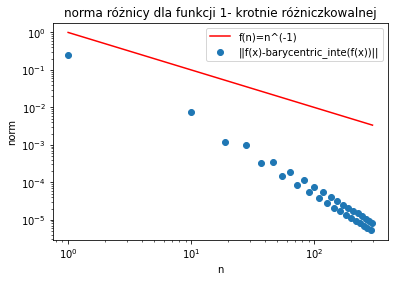

In [9]:
x = np.linspace(-1,1,1000)
n = np.arange(1,300,9)
n_norm = np.zeros([len(n)])
for i in n:
    Y = main.barycentric_inte(main.chebyshev_nodes(i),f2(main.chebyshev_nodes(i)),main.bar_czeb_weights(i),x)
    n_norm[list(n).index(i)] =  main.L_inf(f2(x),Y)
plt.scatter(n,n_norm, label = "||f(x)-barycentric_inte(f(x))||")
plt.yscale("log")
plt.xscale("log")
plt.plot(n,1/n,"r-",label = "f(n)=n^(-1)")
plt.legend()
plt.title("norma różnicy dla funkcji 1- krotnie różniczkowalnej")
plt.xlabel("n")
plt.ylabel("norm")
plt.show()

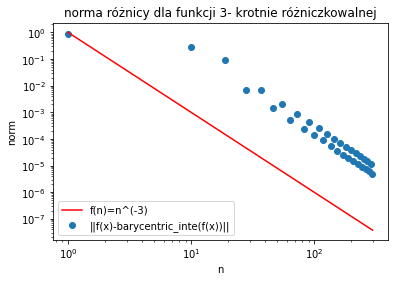

In [10]:
x = np.linspace(-1,1,1000)
n = np.arange(1,300,9)
n_norm = np.zeros([len(n)])
for i in n:
    Y = main.barycentric_inte(main.chebyshev_nodes(i),f3(main.chebyshev_nodes(i)),main.bar_czeb_weights(i),x)
    n_norm[list(n).index(i)] =  main.L_inf(f3(x),Y)
plt.scatter(n,n_norm, label = "||f(x)-barycentric_inte(f(x))||")
plt.yscale("log")
plt.xscale("log")
plt.plot(n,1/n**(3),"r-",label = "f(n)=n^(-3)")
plt.legend()
plt.title("norma różnicy dla funkcji 3- krotnie różniczkowalnej")
plt.xlabel("n")
plt.ylabel("norm")
plt.show()

***Zadanie 6.***  
Przeprowadzić analogiczną analizę dla funkcji analitycznych z [Zadania 2](#zad2). Wykres sporządzić w skali pół logarytmicznej (tylko oś y). 
Dla porównania umieścić na wykresie dodatkowo wykres oszacowania dla interpolacji funkcji analitycznych (zobacz wykład). W tym celu należy wyliczyć maksimum funkcji na przedziale $[-1,1]$ oraz największą elipsę, o ogniskach w punktach $(-1, j0)$ i $(1, j0)$, która nie zawiera pierwiastków mianownika funkcji.

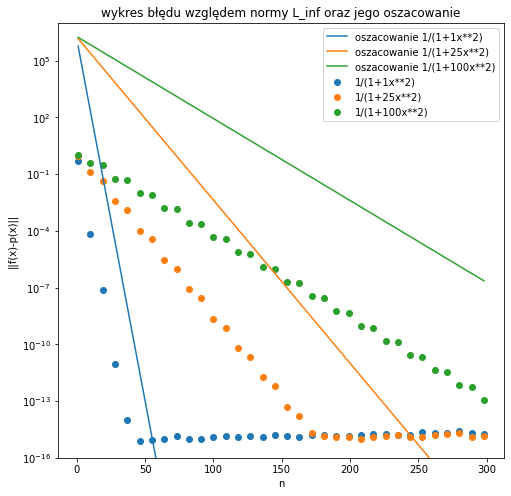

In [11]:
x = np.linspace(-1,1,1000)
n = np.arange(1,300,9)
n_norm_1 = np.zeros([len(n)])
n_norm_2 = np.zeros([len(n)])
n_norm_3 = np.zeros([len(n)])
for i in n:
    Y1 = main.barycentric_inte(main.chebyshev_nodes(i),f4_1(main.chebyshev_nodes(i)),main.bar_czeb_weights(i),x)
    Y2 = main.barycentric_inte(main.chebyshev_nodes(i),f4_2(main.chebyshev_nodes(i)),main.bar_czeb_weights(i),x)
    Y3 = main.barycentric_inte(main.chebyshev_nodes(i),f4_3(main.chebyshev_nodes(i)),main.bar_czeb_weights(i),x)
    n_norm_1[list(n).index(i)] =  main.L_inf(f4_1(x),Y1)
    n_norm_2[list(n).index(i)] =  main.L_inf(f4_2(x),Y2)
    n_norm_3[list(n).index(i)] =  main.L_inf(f4_3(x),Y3)
plt.figure(figsize=[8,8])
plt.scatter(n,n_norm_1, label = "1/(1+1x**2)")
plt.scatter(n,n_norm_2, label = "1/(1+25x**2)")
plt.scatter(n,n_norm_3, label = "1/(1+100x**2)")
b1=1-1e-6
c1=1
a1=np.sqrt(1+b1**2)
rho1=a1+b1
b2=0.2-1e-6
c2=1
a2=np.sqrt(1+b2**2)
rho2=a2+b2
b3=0.1-1e-6
c3=1
a3=np.sqrt(1+b3**2)
rho3=a3+b3
M1=f4_1(1j*b1)
M2=f4_2(1j*b2)
M3 = f4_3(1j*b3)
oszacowanie1=[4*np.real(M1)*rho1**(-x)/(rho1-1) for x in n]
oszacowanie2=[4*np.real(M2)*rho2**(-x)/(rho2-1) for x in n]
oszacowanie3=[4*np.real(M3)*rho3**(-x)/(rho3-1) for x in n]
plt.plot(n,oszacowanie1, label = "oszacowanie 1/(1+1x**2)")
plt.plot(n,oszacowanie2, label = "oszacowanie 1/(1+25x**2)")
plt.plot(n,oszacowanie3, label = "oszacowanie 1/(1+100x**2)")
plt.yscale("log")
plt.legend()
plt.ylim(1e-16,1e7)
plt.title("wykres błędu względem normy L_inf oraz jego oszacowanie")
plt.xlabel("n")
plt.ylabel("||f(x)-p(x)||")
plt.show()

***Zadanie 7.***  
Dla funkcji nieciągłej z [Zadania 2](#zad2) przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

9448


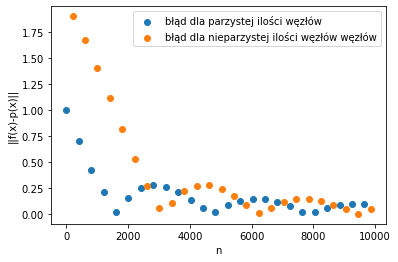

In [12]:
x = np.linspace(-1,1,1000)
n = np.arange(1,10000,201)
n_norm = np.zeros([len(n)])
for i in n:
    Y = main.barycentric_inte(main.chebyshev_nodes(i),f5(main.chebyshev_nodes(i)),main.bar_czeb_weights(i),x)
    n_norm[list(n).index(i)] = main.L_inf(Y,f5(x))

plt.scatter(n[::2],n_norm[::2], label = "błąd dla parzystej ilości węzłów")
plt.scatter(n[1:][::2],n_norm[1:][::2], label = "błąd dla nieparzystej ilości węzłów węzłów")
#plt.yscale("log")
print(n[list(n_norm).index(min(n_norm))])
plt.legend()

plt.xlabel("n")
plt.ylabel("||f(x)-p(x)||")
plt.show()

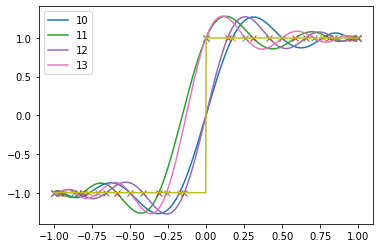

In [13]:
x = np.linspace(-1,1,1000)#
for i in [9,10,11,12]:
    Y = main.barycentric_inte(main.chebyshev_nodes(i),f5(main.chebyshev_nodes(i)),main.bar_czeb_weights(i),x)
    plt.plot(x,Y, label=str(len(main.chebyshev_nodes(i))))
    plt.plot(main.chebyshev_nodes(i),f5(main.chebyshev_nodes(i)),'x')
plt.plot(x, f5(x))
plt.legend()
plt.show()


<a id='zad_ostatnie'></a>
## Wnioski ostatnie zadanie 

tak znaczące różnice między błędami dla parzystej liczby węzłów czebyszewa a nieparzystej wynikają z zaokrąglenia rozmieszczenia węzłów które znajdują się w połowie. z uwagi na tą aproksymację funkcja sign która dla zera zwraca 0 nie zwraca tej wartości dla odciętej która jest aproksymacją zera(wynika z błędów zaokrąglenia). wszystkie węzły występujące dokładnie w połowie są przesunięte w stronę dodatnią przez co błąd jest generowany z uwagi na błędną aproksymację wartości tych punktów w funkcji nieciągłej. co więcej zaobserwowałem ciekawy przypadek w którym funkcja interpolacyjna przy większej ilości węzłów niż punktów dla pewnych wartości n powoduje o dużo lepsze przybliżenie pomijając efekt gibbsa(gdyż wektory w numpy posiadają skończoną liczbę punktów[są dyskretne ] przez co nie są dokładnym odwzorowaniem funkcji ciągłych i niektóre efekty są na tyle małe aby zmieścić się między punktami wektorów dyskretnych). numpy posiada dość ograniczoną dokładność przez co wykresy błędu nie dokońca odwzorowują jak ma się zachowywać błąd minimalny.


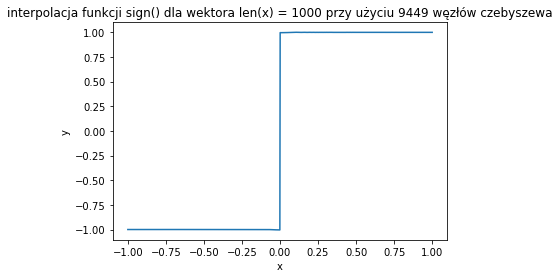

In [14]:
x = np.linspace(-1,1,1000)
Y = main.barycentric_inte(main.chebyshev_nodes(9448),f5(main.chebyshev_nodes(9448)),main.bar_czeb_weights(9448),x)
plt.plot(x,Y)
plt.title("interpolacja funkcji sign() dla wektora len(x) = 1000 przy użyciu 9449 węzłów czebyszewa")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Wnioski:

interpolacja jest bardzo przydatnym narzędziem szczególnie w dziedzinie metod numerycznych lecz wiąże się z nią pewne problemy np. efekt rungego czy efekt gibbsa. na laboratoriach nauczyłem sie interpolować różne klasy funkcji przy użyciu węzłów czebyszewa - użytecznego narzędzia do zmniejszania efektu rungego na końcach przedziału. na zajęciach miałem okazję zapoznać się z wbudowaną w scipy funkcją do interpolacji barycentrycznej która posiada tragiczną złożoność obliczeniową. miałem okazję zaimplementować funkcję z wykładu oraz porównać ją z tą wbudowaną. wyniki testów czasowych okazały się zaskakujące(funkcja z wykładu była bardziej wydajniejsza o około 2 rzędy wielkości). co więcej funkcja wbudowana nie czyta parameterów zapisanych w postaci wykładniczej co może stanowić dość duży problem dla bardzo dokładnej interpolacji. ję=eżeli chodzi o implementację funkcji nie miałem żadnego problemu.

dość trudnym do zrozumienia fragmętem materiału było zadanie z oszacowaniem normy błędu. wydawało mi się to dość skomplikowaną czynnością w szczegulności że na wykładnie nie było podanych metod wyliczania granicznej elipsy  Bernsteina w której nie mieściły się pierwiastki funkcji, należało parametry tej elipsy wyznaczyć "na oko"

[ Wnioski ostatnie zadanie ](#zad_ostatnie) <-- wnioski do zad ostatniego


Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)